## Feature Selection

- Create scikit learn basic pipeline
- Standardize the train data (Done in 8)
- Options :
    - Regularization (glmnet) (Lasso, Ridge, Elastic Net)
    - PCA , MCA
    - Trees - Feature Importance (Random Forest - with filter, Decision Tree)
    - VIF testing
    - Forward Selection
    - Backward Selection    
    - Recursive Feature Elimination
    - Feature Importance (Random Forest, Decision Tree)
    - Correlation Matrix
    


In [1]:
import pandas as pd
import numpy as np
import os

#for multicollinearity issues
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for correlation heat max
import seaborn as sns
from matplotlib import pyplot as plt

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
file_location =  '/Users/chewy2.0/Capstone/data' ##change as necessaru
os.chdir(file_location)

In [3]:
train = pd.read_csv('train_standardized.csv', dtype = {'GEOID':'str'}, low_memory = False)

In [4]:
train.sample(5)

,patent_num,assignee,grant_yr,app_yr,app_num,GEOID,ipc,team_size,men_inventors,women_inventors,...,Award_by_pop_gt_16_lf,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,num_ipcs
66538,8588309,APPLE INC.,2013.0,2010,12755551,06085,H,-0.965916,-0.835071,-0.479849,...,-0.080046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.64189
1131198,D813349,MARSOL TRADING LLC,2018.0,2016,29589427,48201,NaN,0.487883,-0.835071,-0.479849,...,-0.256669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254249,9058361,"SALESFORCE.COM, INC.",2015.0,2012,13554884,06075,G,0.487883,0.275496,1.034332,...,1.261626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.64189
1384872,NaN,The University of Chicago,NaN,2014,14781962,17031,NaN,-0.481316,-1.390355,2.548514,...,0.052548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348795,D820113,KINEKT DESIGN,2018.0,2016,29587582,34013,NaN,-0.965916,-0.835071,-0.479849,...,0.077626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 20% of the train is the validation 
then take validation out of training data

In [67]:
validation_data = train.sample(len(train)//5)
validation_data.head()

,patent_num,assignee,grant_yr,app_yr,app_num,GEOID,ipc,team_size,men_inventors,women_inventors,already_granted,assignee_univ_map,Institution,Control,r1,r2,special_focus,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,women_involved,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,num_ipcs
753974,8070899,WATLOW ELECTRIC MANUFACTURING COMPANY,2011.0,2010,12868456,29510,B,1.941681,1.386063,2.548514,1,watlow electric manufacturing company,NaN,NaN,0,0,0,0.071800,2.737136,0.843764,0.529937,-0.861399,-1.385677,-0.825749,Plains,0.000000,0.030246,0.000000,0.659335,0.779358,0.922889,0.374346,1.084445,1.056084,1.045392,0.589444,1.065352,1.871598,1.142050,4.124569,0.949116,1.749335,0.919156,0.805930,2566821,10634568,9235,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,1,0,0,26930606,256198,-0.735123,168482,-0.717217,-0.781593,-0.764460,-0.714368,-0.802123,-0.935797,-0.573631,-0.481683,-0.785657,-0.904718,-0.676997,-1.224753,-0.905202,0.024498,-0.948826,-0.612661,-0.725780,-0.750590,-0.679854,-0.744957,-0.734311,-0.724042,-0.792669,-0.725448,-0.696128,NaN,1,0.059842,0.120473,0.293939,0.213512,0.101502,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.641890
439007,9508594,INTERNATIONAL BUSINESS MACHINES CORPORATION,2016.0,2015,14930984,36119,B H,0.003283,-0.279788,-0.479849,1,international business machines corporation,NaN,NaN,0,0,0,0.370030,-0.532082,-0.298094,-1.241274,-0.489268,0.141543,1.069885,Mideast,0.376643,0.003507,1.539827,1.317223,0.344959,1.002727,1.050914,0.716688,0.820015,1.047365,1.419592,0.957890,1.666178,0.673585,1.634502,1.323736,1.519100,0.749299,1.285203,6581959,25434548,31733,0,0,1,1,0,1,1,0,0,1,1,0,1,0,1,1,1,0,1,75021278,770360,-0.359482,503509,-0.343126,-0.435563,-0.427049,-0.364795,-0.431513,-0.090311,-0.513328,-0.484300,-0.431101,-0.051329,-0.228555,1.559314,-0.052056,1.135286,0.177874,-0.189004,-0.355292,-0.229287,

In [72]:
train = train.drop(validation_data.index)
train.head()

,patent_num,assignee,grant_yr,app_yr,app_num,GEOID,ipc,team_size,men_inventors,women_inventors,already_granted,assignee_univ_map,Institution,Control,r1,r2,special_focus,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,women_involved,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,num_ipcs
0,7834652,LATTICE SEMICONDUCTOR CORPORATION,2010.0,2010,12709685,41067,H,0.003283,-0.279788,1.034332,1,lattice semiconductor corporation,NaN,NaN,0,0,0,-0.300986,-0.6683,-0.732322,1.081626,0.937232,0.61756,-0.255381,Far West,1.128043,0.07633,0.0,1.026322,1.227994,2.381687,0.975335,0.374296,1.403992,0.902561,1.256738,1.056455,0.0,0.905091,0.900785,0.70196,0.743885,0.729915,0.764135,2574212,10134543,14150,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,35138407,397577,-0.607708,281948,-0.603084,-0.768141,-0.730388,-0.751363,-0.736896,-0.792005,0.179634,-0.211473,-0.736789,-0.789977,-0.674211,-0.929987,-0.789411,0.367527,-0.85077,-0.606752,-0.604693,-0.624054,-0.675387,-0.75,-0.692295,-0.708948,-0.773832,-0.604407,-0.63909,-0.469308,1,-0.387222,-0.740226,-0.123591,-0.400352,-0.587301,-0.31839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.64189
1,7862449,"NIKE, INC.",2011.0,2010,12775718,41067,A,-0.481316,-0.279788,-0.479849,1,"nike, inc.",NaN,NaN,0,0,0,-0.300986,-0.6683,-0.732322,1.081626,0.937232,0.61756,-0.255381,Far West,1.128043,0.07633,0.0,1.026322,1.227994,2.381687,0.975335,0.374296,1.403992,0.902561,1.256738,1.056455,0.0,0.905091,0.900785,0.70196,0.743885,0.729915,0.764135,2574212,10134543,14150,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,35138407,397577,-0.607708,281948,-0.603084,-0.768141,-0.730388,-0.751363,-0.736896,-0.792005,0.179634,-0.211473,-0.736789,-0.789977,-0.674211,-0.929987,-0.789411,0.367527,-0.85077,-0.606752,-0.604693,-0.624054,-0.675387,-0.75,-0.692295,-0.708948,-0.773832,-0.604407,-0.63909,-0.469308,0,-0.387222,-0.740226,

In [49]:
# lists the variables by num / cat
categorical = [
'ipc',
'ipc_A',
'ipc_B',
'ipc_C',
'ipc_D',
'ipc_E',
'ipc_F',
'ipc_G',
'ipc_H',
'already_granted',
'Control',
'r1',
'r2',
'special_focus',
'bea_region',
'Agriculture_Forestry_Fishing_Hunting_base',
'Mining_Quarrying_and_Oil_Gas_Extraction_base',
'Utilities_base',
'Construction_base',
'Manufacturing_base',
'Wholesale_Trade_base',
'Retail_Trade_base',
'Transportation_Warehousing_base',
'Information_base',
'Finance_Insurance_base',
'Real_Estate_Rental_Leasing_base',
'Professional_Scientific_and_Technical_Services_base',
'Management_of_Companies_Enterprises_base',
'Administrative_Support_Waste_Management_Remediation_Services_base',
'Educational_Services_base',
'Health_Care_Social_Assistance_base',
'Arts_Entertainment_and_Recreation_base',
'Accommodation_Food_Services_base',
'Other_Services_except_Public_Administration_base',
]

numeric = [
 'num_ipcs',
 'team_size',
 'men_inventors',
 #'women_inventors',
 'Over25_Less9Grade',
 'Over25_SomeHS',
 'Over25_HSGrad',
 'Over25_SomeCollege',
 'Over25_Assosc',
 'Over25_Bach',
 'Over25_Grad',
 'ap_by_est',
 'pop_gt_16_lf',
 'est_by_pop_gt_16_lf',
 'Total_employment',
 'Pop_Est',
 'Population_Estimate',
 'Population_persons',
 'Earnings_by_place_of_work',
 'Employee_and_self-employed_contributions_for_government_social_insurance',
 'Employer_contributions_for_employee_pension_and_insurance_funds',
 'Employer_contributions_for_government_social_insurance',
 'Equals_Net_earnings_by_place_of_residence',
 'Farm_income',
 'Farm_proprietors_income',
 'Less_Contributions_for_government_social_insurance',
 'Nonfarm_personal_income',
 'Nonfarm_proprietors_income',
 'Per_capita_personal_income_dollars',
 'Personal_income_thousands_of_dollars',
 'Plus_Adjustment_for_residence',
 'Plus_Dividends_interest_and_rent',
 'Plus_Personal_current_transfer_receipts',	
 'Proprietors_employment',
 'Proprietors_income',
 'Supplements_to_wages_and_salaries',
 'Wage_and_salary_employment',
 'Wages_and_salaries',
 'Applications',
 'Award_Amount',
 'GDP_by_labor_force',
 'apps_by_pop_gt_16_lf',
 'Wages_by_pop_gt_16_lf',
 'Award_by_pop_gt_16_lf'
]

# Need to deal with Multicollinarity

- if features coorelated with other features will jack up the selection of best predictors 
    - pairs plot 
    - VIF? 

## This is for all all numeric variables

In [6]:
#gathers the numeric columns only
num_vars = train[numeric]

#get rid of inf's and nans
num_vars = num_vars[~num_vars.isin([np.nan, np.inf, -np.inf]).any(1)]

#look at dimensions
num_vars.shape

(872735, 44)

In [7]:
#empty df for vif info
vif_data = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data["feature"] = num_vars.columns
# VIF column 
vif_data["VIF"] = [variance_inflation_factor(num_vars.values, i) for i in range(len(num_vars.columns))]

In [9]:
vif_data.sort_values(by = 'VIF', ascending = False)

,feature,VIF
30,Plus_Adjustment_for_residence,215592.895667
35,Supplements_to_wages_and_salaries,203602.785727
24,Farm_proprietors_income,185960.656695
19,Employee_and_self-employed_contributions_for_g...,133593.451266
23,Farm_income,114340.897004
22,Equals_Net_earnings_by_place_of_residence,77575.742077
17,Population_persons,66870.991666
33,Proprietors_employment,55032.980884
26,Nonfarm_personal_income,44958.672691
37,Wages_and_salaries,28870.623934


## Now with fewer variables to hopefully lower the VIFS???

In [12]:
limited_numeric = [
 'num_ipcs',
 'team_size',
 #'men_inventors',
 'women_inventors',
 #'Over25_Less9Grade',
 #'Over25_SomeHS',
 #'Over25_HSGrad',
 #'Over25_SomeCollege',
 #'Over25_Assosc',
 #'Over25_Bach',
 'Over25_Grad',
 'ap_by_est',
 #'pop_gt_16_lf',
 #'est_by_pop_gt_16_lf',
 #'Total_employment',
 'Pop_Est',
 #'Population_Estimate',
 #'Population_persons',
 #'Earnings_by_place_of_work',
 #'Employee_and_self-employed_contributions_for_government_social_insurance',
 #'Employer_contributions_for_employee_pension_and_insurance_funds',
 #'Employer_contributions_for_government_social_insurance',
 #'Equals_Net_earnings_by_place_of_residence',
 'Farm_income',
 #'Farm_proprietors_income',
 #'Less_Contributions_for_government_social_insurance',
 #'Nonfarm_personal_income',
 #'Nonfarm_proprietors_income',
 #'Per_capita_personal_income_dollars',
 #'Personal_income_thousands_of_dollars',
 #'Plus_Adjustment_for_residence',
 #'Plus_Dividends_interest_and_rent',
 #'Plus_Personal_current_transfer_receipts',	
 #'Proprietors_employment',
 #'Proprietors_income',
 #'Supplements_to_wages_and_salaries',
 #'Wage_and_salary_employment',
 #'Wages_and_salaries',
 #'Applications',
 #'Award_Amount',
 'GDP_by_labor_force',
 'apps_by_pop_gt_16_lf',
 'Wages_by_pop_gt_16_lf',
 'Award_by_pop_gt_16_lf'
]

In [32]:
# #don't include women inventors becasue that's the response variable for the log regression
# limited_numeric = [
#  'num_ipcs',
#  'team_size',
#  #'men_inventors',
#  #'women_inventors',
#  #'Over25_Less9Grade',
#  #'Over25_SomeHS',
#  #'Over25_HSGrad',
#  #'Over25_SomeCollege',
#  #'Over25_Assosc',
#  #'Over25_Bach',
#  'Over25_Grad',
#  'ap_by_est',
#  #'pop_gt_16_lf',
#  'est_by_pop_gt_16_lf',
#  #'Total_employment',
#  'Pop_Est',
#  #'Population_Estimate',
#  #'Population_persons',
#  #'Earnings_by_place_of_work',
#  #'Employee_and_self-employed_contributions_for_government_social_insurance',
#  #'Employer_contributions_for_employee_pension_and_insurance_funds',
#  #'Employer_contributions_for_government_social_insurance',
#  #'Equals_Net_earnings_by_place_of_residence',
#  'Farm_income',
#  #'Farm_proprietors_income',
#  'Less_Contributions_for_government_social_insurance',
#  #'Nonfarm_personal_income',
#  #'Nonfarm_proprietors_income',
#  #'Per_capita_personal_income_dollars',
#  #'Personal_income_thousands_of_dollars',
#  #'Plus_Adjustment_for_residence',
#  #'Plus_Dividends_interest_and_rent',
#  #'Plus_Personal_current_transfer_receipts',	
#  #'Proprietors_employment',
#  #'Proprietors_income',
#  #'Supplements_to_wages_and_salaries',
#  #'Wage_and_salary_employment',
#  'Wages_and_salaries',
#  'Applications',
#  'Award_Amount',
#  'GDP_by_labor_force'
# ]

In [13]:
#gathers the numeric columns only
num_vars_2 = train[limited_numeric]

#get rid of inf's and nans
num_vars_2 = num_vars_2[~num_vars_2.isin([np.nan, np.inf, -np.inf]).any(1)]

#look at dimensions
num_vars_2.shape

(872735, 11)

In [14]:
#empty df for vif info
vif_data_2 = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data_2["feature"] = num_vars_2.columns
# VIF column 
vif_data_2["VIF"] = [variance_inflation_factor(num_vars_2.values, i) for i in range(len(num_vars_2.columns))]

In [15]:
vif_data_2.sort_values(by = 'VIF', ascending = False)

,feature,VIF
9,Wages_by_pop_gt_16_lf,53.914962
7,GDP_by_labor_force,45.733068
4,ap_by_est,4.904562
3,Over25_Grad,1.895177
8,apps_by_pop_gt_16_lf,1.649522
10,Award_by_pop_gt_16_lf,1.593418
1,team_size,1.245005
2,women_inventors,1.241185
5,Pop_Est,1.167838
6,Farm_income,1.166368


In [36]:
#num_vars_2.corr()

In [16]:
my_corr = num_vars_2.corr()

Text(0.5, 1.0, 'Correlation Between Limited Numeric Info')

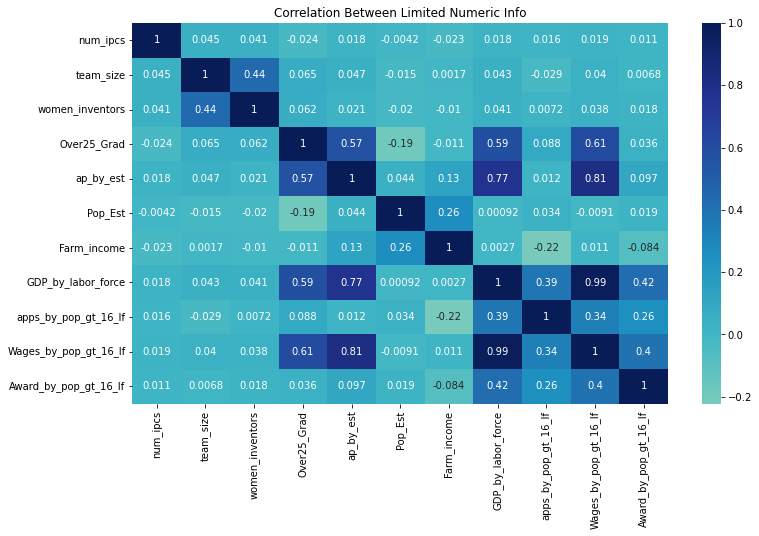

In [18]:
plt.figure(figsize = (12,7))
sns.heatmap(my_corr, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Limited Numeric Info")

### Lasso for Feature Selection 
- not important features got to zero

In [81]:
### from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
#with cross validation and l1 (lasso)
#model = LogisticRegressionCV(solver='saga', random_state=0, penalty = 'elasticnet', cv = 2, l1_ratios = [0.5,0.5])

# without cross validation
model = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')


In [31]:
train_no_nans = train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]
train_no_nans.shape

(31693, 112)

In [73]:
validation_no_nans = validation_data[~validation_data.isin([np.nan, np.inf, -np.inf]).any(1)]
validation_no_nans.shape

(6402, 112)

In [76]:
model.fit(train_no_nans[numeric], train_no_nans['women_involved'])


# clf = linear_model.LogisticRegression(
#     penalty="l1",
#     solver="liblinear",
#     tol=1e-6,
#     max_iter=int(1e6),
#     warm_start=True,
#     intercept_scaling=10000.0,
# )

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [25]:
#[print(i) for i in train.columns]


In [77]:
df = pd.DataFrame()
df['var'] = train[numeric].columns
df['coef'] = model.coef_[0]

In [78]:
df

,var,coef
0,num_ipcs,0.031463
1,team_size,5.233047
2,men_inventors,-4.493450
3,Over25_Less9Grade,0.151629
4,Over25_SomeHS,0.000000
5,Over25_HSGrad,-0.069375
6,Over25_SomeCollege,0.017327
7,Over25_Assosc,-0.011208
8,Over25_Bach,-0.122911
9,Over25_Grad,0.000000


In [79]:
#model.coef_

In [ ]:
## See how it did by running it on the 

In [ ]:
# y_pred = classifier.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

## See how it did using the validation 

In [80]:
y_pred = model.predict(validation_no_nans[numeric])
print(confusion_matrix(validation_no_nans['women_involved'], y_pred))
print(classification_report(validation_no_nans['women_involved'], y_pred))

[[3460  412]
 [ 938 1592]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      3872
           1       0.79      0.63      0.70      2530

    accuracy                           0.79      6402
   macro avg       0.79      0.76      0.77      6402
weighted avg       0.79      0.79      0.78      6402



# Now with Elastinet

In [91]:
#with cross validation and l1 (lasso)
#model = LogisticRegressionCV(solver='saga', random_state=0, penalty = 'elastinet', cv = 2, l1_ratios = [0.5,0.5])

# without cross validation
model2 = LogisticRegression(solver='saga', random_state=0, penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 10000)

In [92]:
model2.fit(train_no_nans[numeric], train_no_nans['women_involved'])


LogisticRegression(l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=0, solver='saga')

In [93]:
df2 = pd.DataFrame()
df2['var'] = train[numeric].columns
df2['coef'] = model2.coef_[0]

In [95]:
df2.sort_values(by ='coef')

,var,coef
2,men_inventors,-4.482776
32,Proprietors_employment,-1.037283
15,Population_Estimate,-0.826439
16,Population_persons,-0.825890
20,Employer_contributions_for_government_social_i...,-0.342243
24,Less_Contributions_for_government_social_insur...,-0.257612
23,Farm_proprietors_income,-0.239607
34,Supplements_to_wages_and_salaries,-0.229960
37,Applications,-0.224184
18,Employee_and_self-employed_contributions_for_g...,-0.182871


In [96]:
y_pred2 = model2.predict(validation_no_nans[numeric])
print(confusion_matrix(validation_no_nans['women_involved'], y_pred2))
print(classification_report(validation_no_nans['women_involved'], y_pred2))

[[3463  409]
 [ 938 1592]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      3872
           1       0.80      0.63      0.70      2530

    accuracy                           0.79      6402
   macro avg       0.79      0.76      0.77      6402
weighted avg       0.79      0.79      0.78      6402



In [97]:
train.describe(include = 'all')

,patent_num,assignee,grant_yr,app_yr,app_num,GEOID,ipc,team_size,men_inventors,women_inventors,already_granted,assignee_univ_map,Institution,Control,r1,r2,special_focus,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,women_involved,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,num_ipcs
count,804468,1269533,804468.000000,1.272920e+06,1.272920e+06,1272920,728297,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1269533,50152,50152,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1272920,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.217911e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.272920e+06,1.217911e+06,728297.000000,728297.000000,728297.000000,728297.000000,728297.000000,728297.000000,728297.000000,728297.000000,728297.000000
unique,796122,111818,NaN,NaN,NaN,2181,196,NaN,NaN,NaN,NaN,89413,216,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,

In [100]:
train[numeric].isna().any()

num_ipcs                                                                     True
team_size                                                                   False
men_inventors                                                               False
Over25_Less9Grade                                                           False
Over25_SomeHS                                                               False
Over25_HSGrad                                                               False
Over25_SomeCollege                                                          False
Over25_Assosc                                                               False
Over25_Bach                                                                 False
Over25_Grad                                                                 False
ap_by_est                                                                   False
pop_gt_16_lf                                                                False
est_by_pop_gt_16